In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Fourier transform

Periodic functions (e.g. over $x \in [0,L]$) permit Fourier decomposition

$$
f(x) = \sum_{k=-\infty}^{\infty} \gamma_k \exp\left(i \frac{2\pi kx}{L} \right).
$$

Fourier coefficients read

$$
\gamma_k = \frac{1}{L} \int_0^L f(x) \, \exp\left(-i \frac{2\pi kx}{L}\right) dx.
$$

If a function is not periodic, it can always be forced to be periodic
![periodic](http://www-personal.umich.edu/~mejn/cp/figures/fig7-1.png)


For even and odd functions around the midpoint $x = L/2$ the Fourier series becomes cosine and sine series, respectively,

$$
f(x) = \sum_{k=0}^{\infty} \alpha_k \cos\left(\frac{2\pi kx}{L} \right),
$$

with

$$
\alpha_k = \frac{2 - \delta_{k0}}{L} \int_0^L f(x) \, \cos\left(\frac{2\pi kx}{L}\right) dx
$$

and

$$
f(x) = \sum_{k=1}^{\infty} \beta_k \sin\left(\frac{2\pi kx}{L} \right),
$$

with

$$
\beta_k = \frac{2}{L} \int_0^L f(x) \, \sin\left(\frac{2\pi kx}{L}\right) dx.
$$

Related to the exponential series through
$$
\gamma_k = \frac{1+\delta_{k0}}{2} \left[ \alpha_{|k|} - i \operatorname{sign}(k) \beta_{|k|} \right]
$$

### Evaluating Fourier coefficients

To evalute

$$
\gamma_k = \frac{1}{L} \int_0^L f(x) \, \exp\left(-i \frac{2\pi kx}{L}\right) dx.
$$

let us apply $N$-point trapezoidal rule ( $x_n = hn$, $h = L/N$)

$$
\gamma_k \simeq \frac{1}{L} \frac{L}{N}  \left[ \frac{f(0)}{2} + \frac{f(L)}{2} + \sum_{n=1}^{N-1} f(x_n) \exp\left( -i \frac{2\pi k x_n}{L}\right) \right].
$$

The function is periodic, $f(0) = f(L)$. Also $x_n = L \frac{n}{N}$. We have

$$
\gamma_k = \frac{1}{N} \sum_{n=0}^{N-1} y_n \exp\left( -i \frac{2\pi k n}{N}\right),
$$

where we introduced
$$
y_n \equiv f(x_n).
$$

This is the *discrete Fourier transform* (DFT).
Typically one uses the coefficients without the factor $1/N$, i.e.

$$
c_k = \sum_{n=0}^{N-1} y_n \exp\left( -i \frac{2\pi k n}{N}\right).
$$

Note that if $y_n$ are all real, we have

\begin{align*}
c_{N-k} & = \sum_{n=0}^{N-1} y_n \exp\left( -i \frac{2\pi (N-k) n}{N}\right) \\
& = \exp\left( -i 2\pi n\right) \sum_{n=0}^{N-1} y_n \exp\left( i \frac{2\pi k n}{N}\right) \\
& = c_k^*
\end{align*}

In [101]:
def dft(y):
    N = len(y)
    c = np.zeros(N, complex)
    for k in range(N):
        for n in range(N):
            c[k] += y[n] * np.exp(-2j * np.pi * k * n / N)
    return c

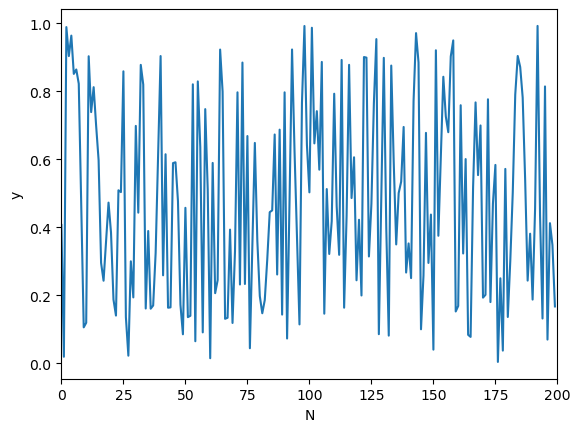

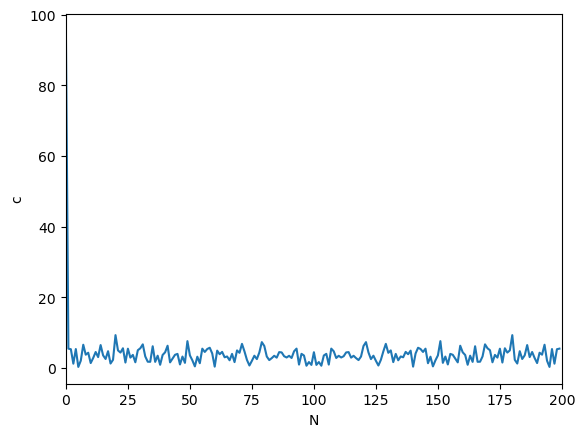

In [110]:
N = 200
y = np.random.rand(N)
#print("y = ", y)
plt.plot(y)
plt.xlabel("N")
plt.ylabel("y")
plt.xlim(0,N)
plt.show()

c = dft(y)
#print("c = ", c)
plt.plot(np.abs(c))
plt.xlabel("N")
plt.ylabel("c")
plt.xlim(0,N)
plt.show()

## Inverse DFT

Consider the following geometric progression

$$
\sum_{k=0}^{N-1} e^{i 2\pi km/N} = \frac{1 - e^{i2\pi m}}{1-e^{i2\pi m/N}} = \delta_{m0}.
$$

This tells us that $\sum_{k=0}^{N-1} e^{i 2\pi km/N} = N$ is $m$ is zero or multiple of $N$, and zero for any other integer value of $m$.

We use this now to evaluate the following sum

\begin{align*}
\sum_{k=0}^{N-1} c_k \exp\left( i\frac{2\pi kn}{N} \right) & = 
\sum_{k=0}^{N-1} \sum_{k'=0}^{N-1} y_{k'} \exp\left( -i \frac{2\pi k' k}{N}\right) \exp\left( i\frac{2\pi kn}{N} \right) \\
& = \sum_{k=0}^{N-1} \sum_{k'=0}^{N-1} y_{k'} \exp\left(i \frac{2\pi (n-k') k}{N}\right) \\
& = \sum_{k'=0}^{N-1} y_{k'} \delta_{n-k',0} \\
& = N y_n.
\end{align*}

Therefore,

$$
y_n = \frac{1}{N} \sum_{k=0}^{N-1} c_k \exp\left( i\frac{2\pi kn}{N} \right),
$$

and the function values can be recovered from the Fourier coefficients.
This is called inverse DFT.

In [105]:
def inverse_dft(c):
    N = len(c)
    y = np.zeros(N, complex)
    for k in range(N):
        for n in range(N):
            y[n] += c[k] * np.exp(2j * np.pi * k * n / N)
    return y / N

In [106]:
N = 20
y = np.random.rand(N)
print("y = ", y)
c = dft(y)
print("c = ", c)
yinv = inverse_dft(c)
print("y = ", yinv)

y =  [0.86046716 0.48175562 0.06576607 0.73962908 0.61970857 0.26800379
 0.82606492 0.47751752 0.56001126 0.25493145 0.01241648 0.6918537
 0.81113769 0.27735761 0.09617065 0.17598327 0.27550172 0.93691544
 0.50237258 0.1342621 ]
c =  [ 9.06782667+0.00000000e+00j  0.41721559-6.84001863e-01j
  0.0708089 +3.20029273e-01j  0.04707852+1.44889560e+00j
 -1.17455143-1.23742486e+00j  1.6240357 +2.81762241e-04j
  0.9057288 -7.21848714e-01j  2.18903831-1.12193177e+00j
 -0.06718515-4.86177561e-01j -0.03711474+5.50581297e-01j
  0.19140753+4.00264145e-15j -0.03711474-5.50581297e-01j
 -0.06718515+4.86177561e-01j  2.18903831+1.12193177e+00j
  0.9057288 +7.21848714e-01j  1.6240357 -2.81762241e-04j
 -1.17455143+1.23742486e+00j  0.04707852-1.44889560e+00j
  0.0708089 -3.20029273e-01j  0.41721559+6.84001863e-01j]
y =  [0.86046716-4.10782519e-16j 0.48175562+6.66133815e-16j
 0.06576607-1.69309011e-16j 0.73962908-2.47649123e-15j
 0.61970857-1.02834408e-15j 0.26800379-1.90680804e-15j
 0.82606492+3.33066907e-1

We can try on a signal with wave-like shape and some noise
(from http://www-personal.umich.edu/~mejn/cp/programs/dft.py)

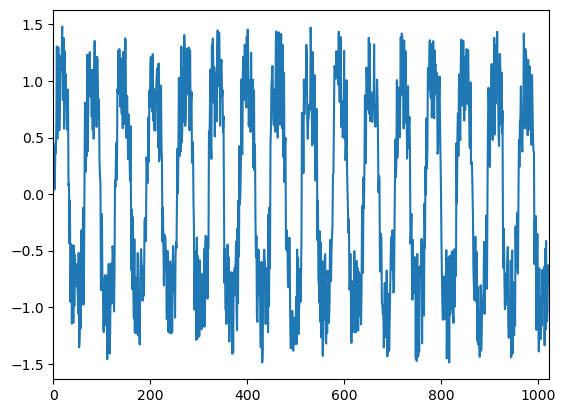

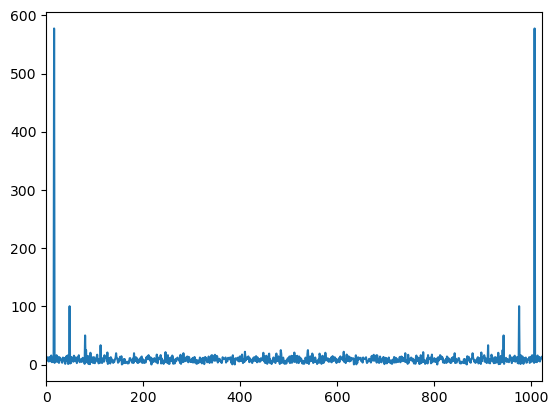

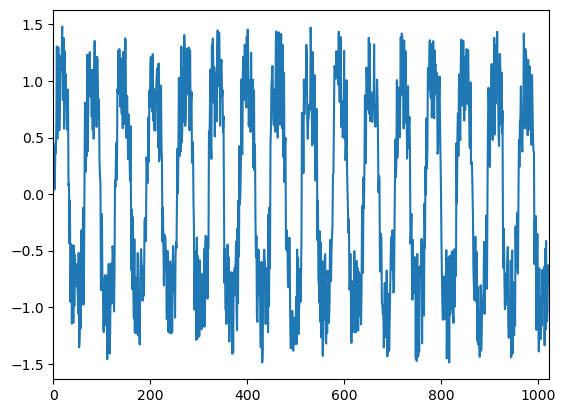

CPU times: user 3.58 s, sys: 50.4 ms, total: 3.63 s
Wall time: 2.48 s


In [90]:
%%time

## Data from http://www-personal.umich.edu/~mejn/cp/programs/dft.py
y = np.loadtxt("pitch.txt",float)
plt.plot(y)
plt.xlim(0,len(y))
plt.show()

c = dft(y)
plt.plot(np.abs(c))
plt.xlim(0,len(y))
plt.show()

yinv = inverse_dft(c)
plt.plot(np.real(yinv))
plt.xlim(0,len(y))
plt.show()

### Discrete cosine and sine transforms

Mirror the function over $x \in [0,L/2]$ and make it (anti)symmetric around $x = L/2$.
Then apply the standard Fourier transform

![periodic](http://www-personal.umich.edu/~mejn/cp/figures/fig7-5.png)


## Fast Fourier transform

The straightforward implementation of DFT makes $N$ operations for each of the $N$ Fourier components $c_k$, giving $O(N^2)$ complexity.
This makes it impractical for large data sets.
Fast Fourier Transform (FFT) achieves the result in $N \log N$ complexity.
It employs divide-and-conquer approaches.
The most common one is the *Cooley-Tukey algorithm*.

To see how it works, let us consider a case where $N$ is a power of two $N = 2^M$
and we want to compute the Fourier transform of $(y_0,y_1,\ldots,y_N)$.
By definition we have

$$
c_k = \sum_{n=0}^{N-1} y_n \exp\left( -i \frac{2\pi k n}{N}\right).
$$

We can split the sum into even and odd elements

\begin{align*}
c_k & = \sum_{n=0}^{N/2-1} y_{2n} \exp\left( -i \frac{2\pi k (2n)}{N}\right) + \sum_{n=0}^{N/2-1} y_{2n+1} \exp\left( -i \frac{2\pi k (2n+1)}{N}\right) \\
& = \sum_{n=0}^{N/2-1} y_{2n} \exp\left( -i \frac{2\pi k n}{N/2}\right) + \exp\left( -i \frac{2\pi k}{N} \right) \sum_{n=0}^{N/2-1} y_{2n+1} \exp\left( -i \frac{2\pi k n}{N/2}\right) \\
& = E_k + \exp\left( -i \frac{2\pi k}{N} \right)  O_k.
\end{align*}

$c_k$ can be expressed as a sum of two elements, one is $k$th element from a DFT of all even elements, $(y_0, y_2, \ldots, y_{N-2})$, and another is a $k$th element from a DFT of all odd elements, $(y_1, y_3, \ldots, y_{N-1})$.

The interpretation makes sense if $k < N/2$. 

Other Fourier components can be expressed as $k + N/2$ and read

\begin{align*}
c_{k+N/2} & = 
\sum_{n=0}^{N/2-1} y_{2n} \exp\left( -i \frac{2\pi (k+N/2) n}{N/2}\right) + \exp\left( -i \frac{2\pi (k+N/2)}{N} \right) \sum_{n=0}^{N/2-1} y_{2n+1} \exp\left( -i \frac{2\pi (k+N/2) n}{N/2}\right) \\
& = E_k - \exp\left( -i \frac{2\pi k}{N} \right)  O_k.
\end{align*}

We see that all elements above $N/2$ can also be expressed in terms of $k$th element from a DFT of all even elements, $(y_0, y_2, \ldots, y_{N-2}$, and another is a $k$th element from a DFT of all odd elements, $(y_1, y_3, \ldots, y_{N-1})$.

Therefore, the problem of evaluating a DFT of $N$ elements reduces to the evalution of two DFTs of $N/2$ elements.
This can be continues recursive until $N = 1$, where $c_k = y_k$.
Since at each step $N$ is halved, we only have to do $\log N$ such steps, giving an overall complexity of $O(N \log N)$.

In [91]:
# Compute DFT of (y_st, y_st+s, y_st+2s, ..., y_st+(N-1)s)
def fft_recursive(y, st, N, s):
    if (N == 1):
        return np.array([y[st]])
    else:
        c = np.empty(N, complex)
        c1 = fft_recursive(y, st, N//2, 2*s)
        c2 = fft_recursive(y, st + s, N//2, 2*s)
        for k in range(N//2):
            p = c1[k]
            q = np.exp(-2j*np.pi*k/N) * c2[k]
            c[k] = p + q
            c[k + N//2] = p - q
        return c

# N = len(y) must be a power of 2
def fft(y):
    N = len(y)
    return FFT_recursive(y, 0, N, 1)

In [92]:
M = 10
N = 2**M
y = np.random.rand(N)

In [93]:
%%time

# Try naive DFT
cdft = dft(y)

CPU times: user 2.02 s, sys: 26.3 ms, total: 2.05 s
Wall time: 1.61 s


In [94]:
%%time

# Now compare to FFT
cfft = fft(y)

print(cdft - cfft)

[-7.95807864e-13+0.00000000e+00j  4.66293670e-14+6.43929354e-14j
 -2.57571742e-14+4.08562073e-14j ...  1.42890144e-11-1.61026747e-12j
  2.72741829e-11+5.71453995e-12j  1.94777527e-12-1.27142741e-12j]
CPU times: user 5.85 ms, sys: 86 µs, total: 5.93 ms
Wall time: 5.88 ms


We can try now the data set we had before.

N =  1024


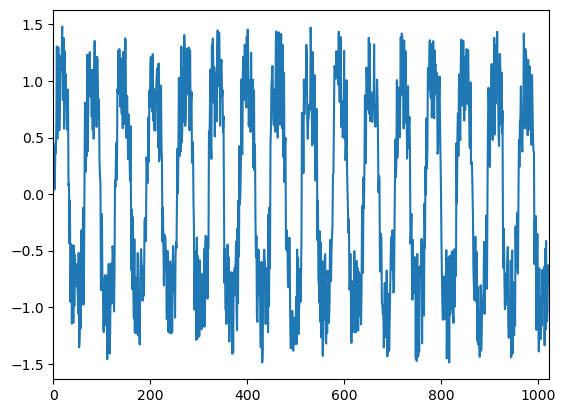

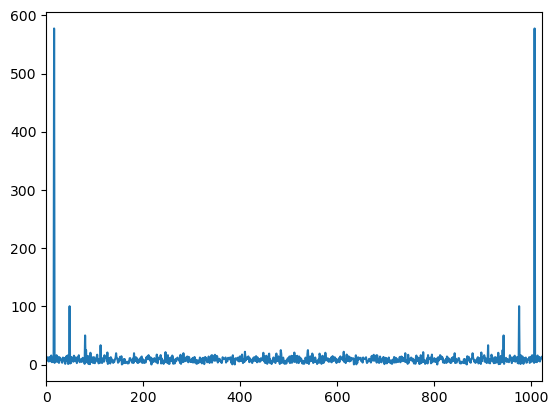

CPU times: user 307 ms, sys: 9.85 ms, total: 317 ms
Wall time: 121 ms


In [99]:
%%time

print("N = ",len(y))
y = np.loadtxt("pitch.txt",float)
plt.plot(y)
plt.xlim(0,len(y))
plt.show()

c = fft(y)
plt.plot(np.abs(c))
plt.xlim(0,len(y))
plt.show()

Compare with numpy implementation

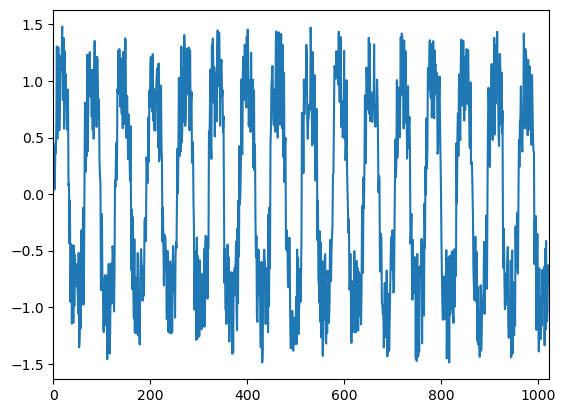

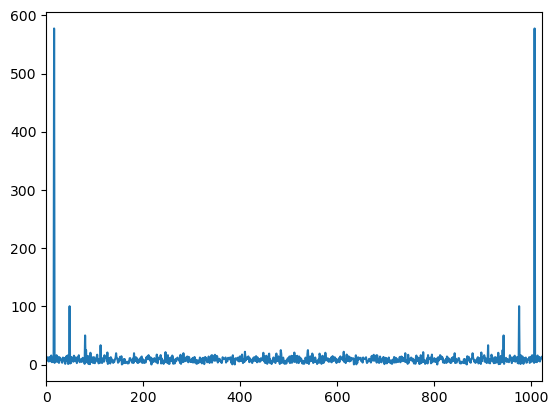

CPU times: user 299 ms, sys: 10.1 ms, total: 309 ms
Wall time: 118 ms


In [100]:
%%time

y = np.loadtxt("pitch.txt",float)
plt.plot(y)
plt.xlim(0,len(y))
plt.show()

c = np.fft.fft(y)
plt.plot(np.abs(c))
plt.xlim(0,len(y))
plt.show()